## NN Adv Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/투빅스/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/투빅스/Test.csv')

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train['label'].nunique()

10

In [6]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [7]:
X = train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = train.iloc[:, -1].values

In [11]:
X_test = test.values
X_test = X_test.reshape(-1, 28, 28, 1)

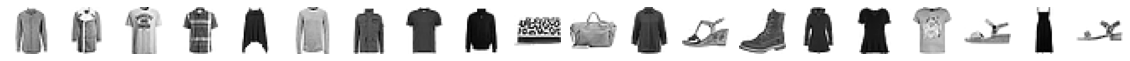

In [12]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [14]:
BATCH_SIZE = 128
EPOCHS = 10

In [15]:
model=keras.models.Sequential([keras.layers.Conv2D(32,7,activation='relu', padding = 'same',
                                                  input_shape=[28,28,1]), #cnn 사용
                               keras.layers.BatchNormalization(),#배치놈
                               keras.layers.Conv2D(64, 3,activation='relu', padding = 'same'),
                               keras.layers.Conv2D(64, 3,activation='relu', padding = 'same'),
                               keras.layers.MaxPooling2D(2), #풀링하기
                               keras.layers.Dropout(0.3),#드롭아웃
                               keras.layers.BatchNormalization(),
                               keras.layers.Conv2D(128, 3,activation='relu', padding = 'same'),
                               keras.layers.Conv2D(256, 3,activation='relu', padding = 'same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.BatchNormalization(),
                               keras.layers.Flatten(), #배열형태로 변경
                               keras.layers.Dense(128,activation='relu'),#Fully connected Layer
                               keras.layers.Dropout(0.3),
                               keras.layers.Dense(64,activation='relu'),
                               keras.layers.Dropout(0.3),
                               keras.layers.Dense(10,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer= 'adam' ,metrics=['accuracy'])
result=model.fit(X_train,y_train,epochs=25,  batch_size=64, validation_data=(X_val, y_val))

Epoch 1/25
744/744 [==============================] - 23s 17ms/step - loss: 0.6616 - accuracy: 0.7721 - val_loss: 0.3673 - val_accuracy: 0.8641
Epoch 2/25
744/744 [==============================] - 11s 15ms/step - loss: 0.4030 - accuracy: 0.8600 - val_loss: 0.2699 - val_accuracy: 0.9026
Epoch 3/25
744/744 [==============================] - 12s 16ms/step - loss: 0.3291 - accuracy: 0.8833 - val_loss: 0.2624 - val_accuracy: 0.9039
Epoch 4/25
744/744 [==============================] - 12s 16ms/step - loss: 0.2953 - accuracy: 0.8949 - val_loss: 0.2445 - val_accuracy: 0.9138
Epoch 5/25
744/744 [==============================] - 12s 16ms/step - loss: 0.2717 - accuracy: 0.9034 - val_loss: 0.2248 - val_accuracy: 0.9197
Epoch 6/25
744/744 [==============================] - 12s 16ms/step - loss: 0.2517 - accuracy: 0.9104 - val_loss: 0.2165 - val_accuracy: 0.9230
Epoch 7/25
744/744 [==============================] - 12s 16ms/step - loss: 0.2365 - accuracy: 0.9148 - val_loss: 0.2238 - val_accuracy:

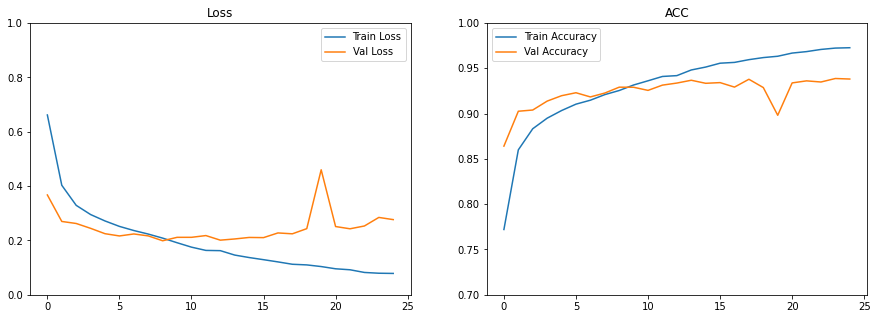

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) #행하나 열두개

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()